****Author: Kelvin Offei Anim****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset
df = pd.read_csv('bank-additional-full.csv', sep =';')

**EXPLORATORY DATA ANALYSIS**

In [3]:
# Exploratory Data Analysis (EDA)
print("\n-- Data Overview --")
df.head()


-- Data Overview --


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# checking the dataset shape(no. of rows and columns) 
df.shape

(41188, 21)

In [5]:
# checking the data types
print("\n-- Data Types --")
print(df.dtypes)


-- Data Types --
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [6]:
print("\n -- Data Info --")
df.info()


 -- Data Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx

In [6]:
# Dataset description
print("\n-- Dataset Description --")
df.describe()


-- Dataset Description --


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
print("\n -- Target Variable Distribution --")
df['y'].value_counts(normalize=True)

#df['y'].value_counts()


 -- Target Variable Distribution --


y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

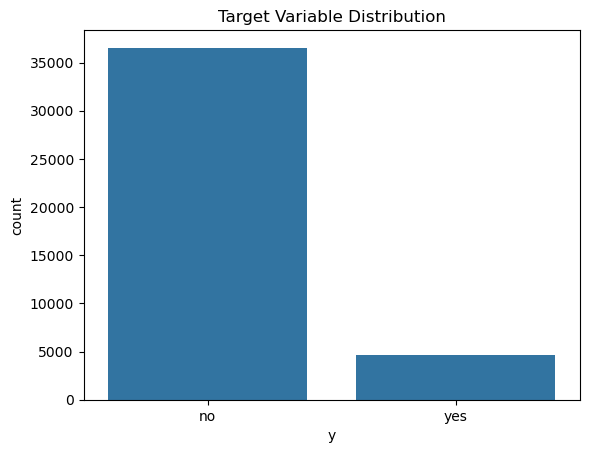

In [9]:
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

In [10]:
# Plot distribution of numerical features
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_features.remove('duration') if 'duration' in numerical_features else None # 'duration' is not a feature for prediction


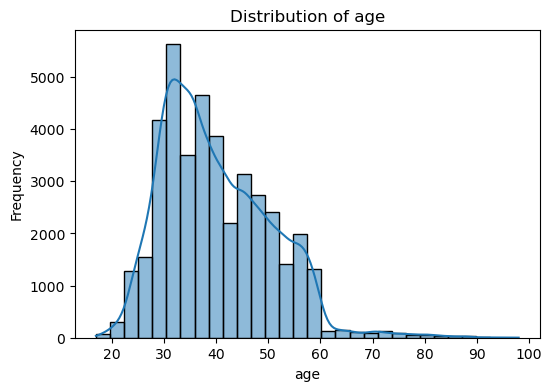

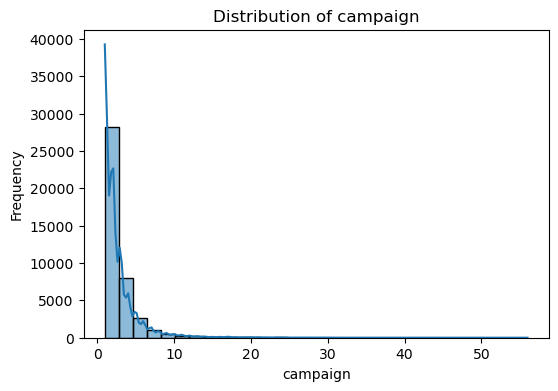

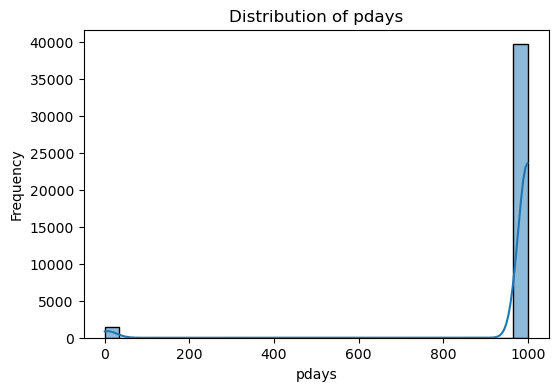

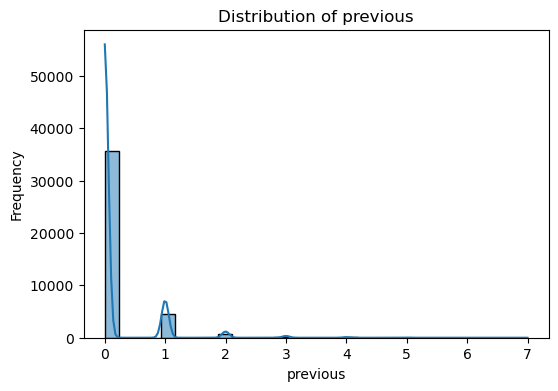

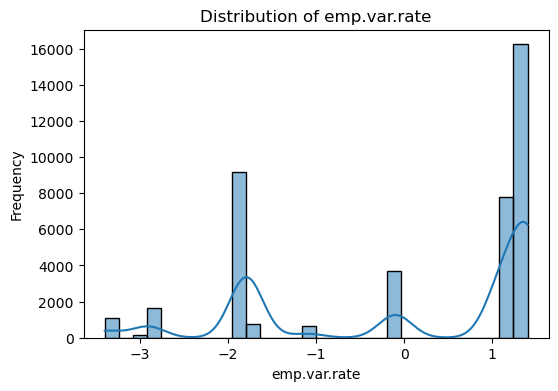

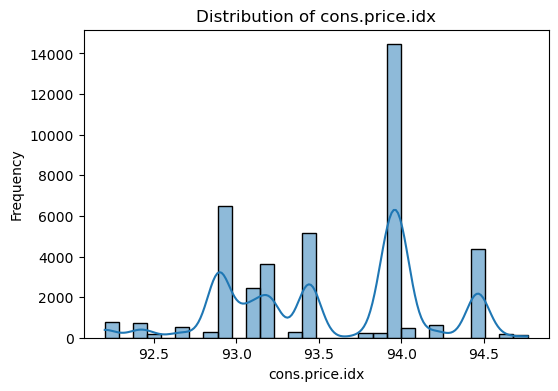

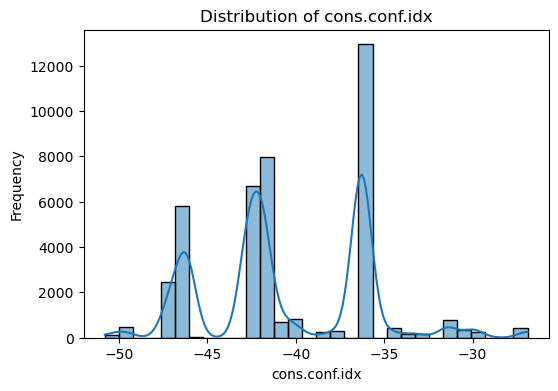

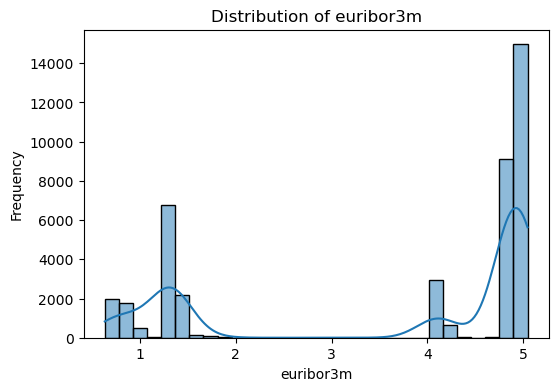

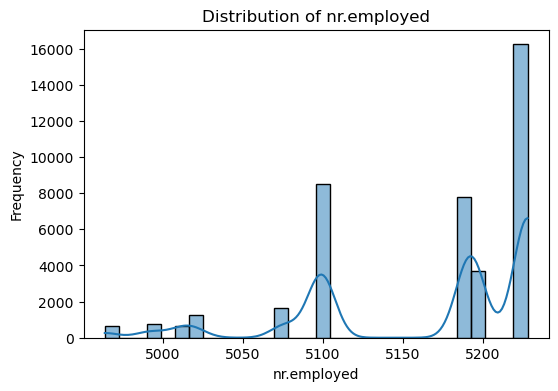

In [13]:
for feat in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data = df, x = feat, kde=True, bins=30)
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.show()

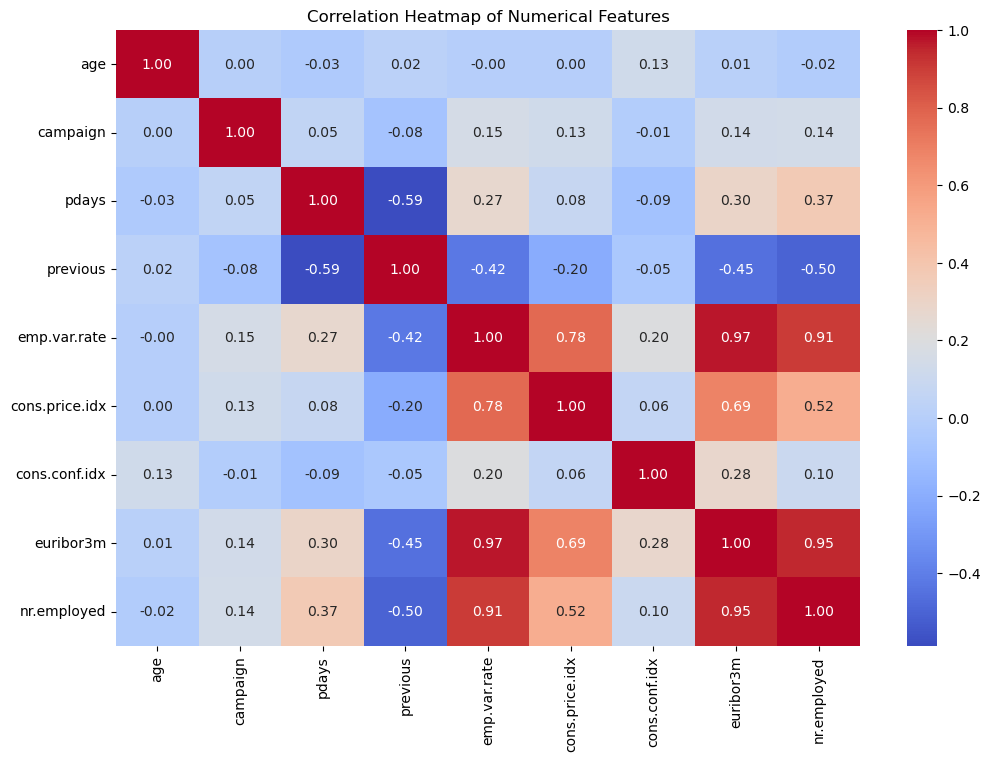

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Exploring Relationship Between Categorical Variables and Target Variable**

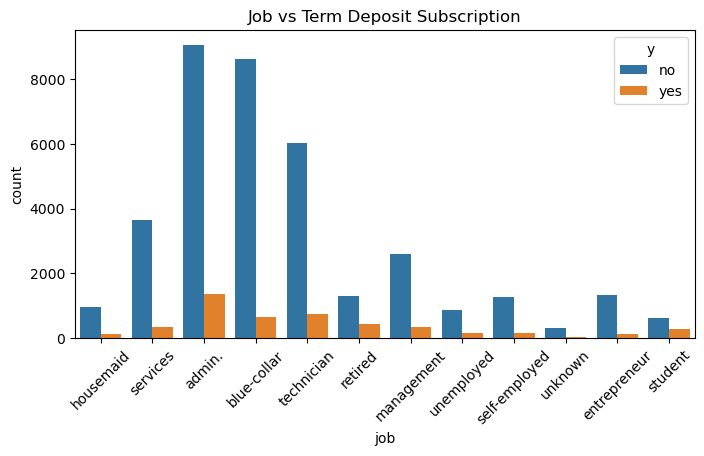

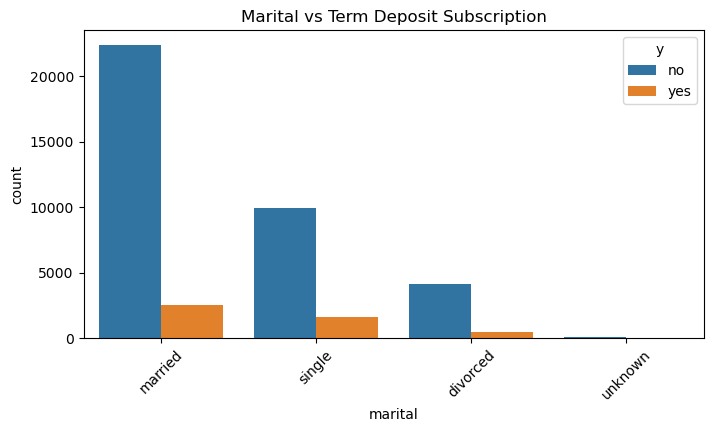

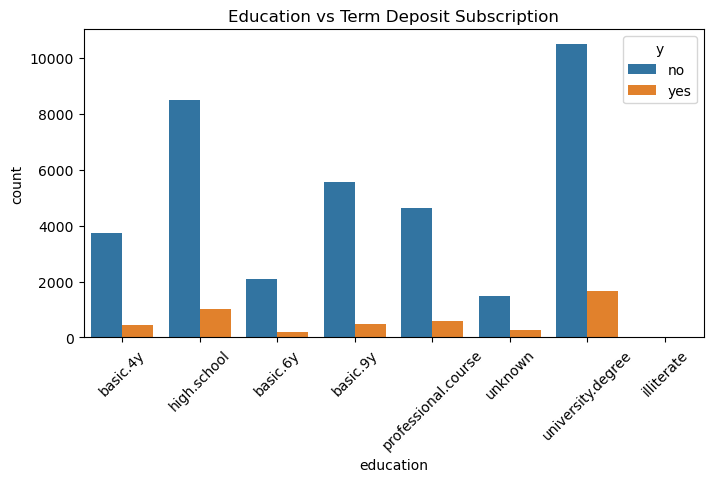

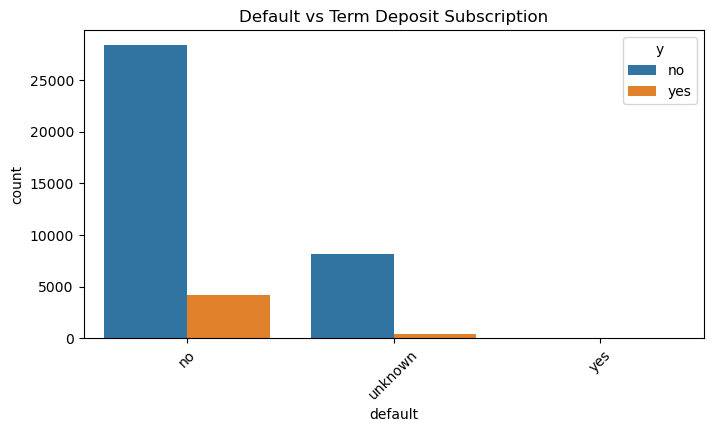

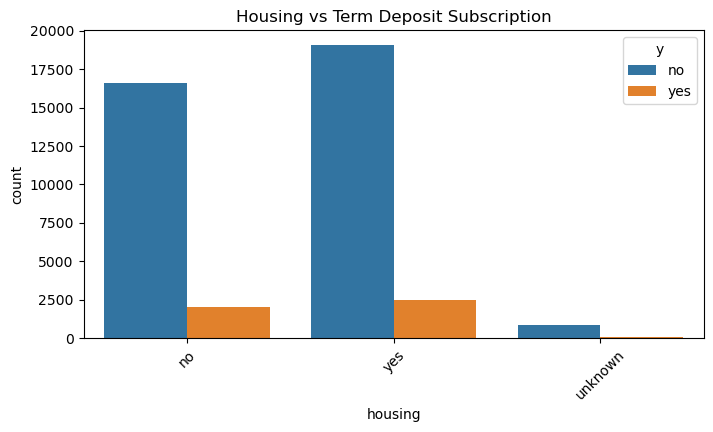

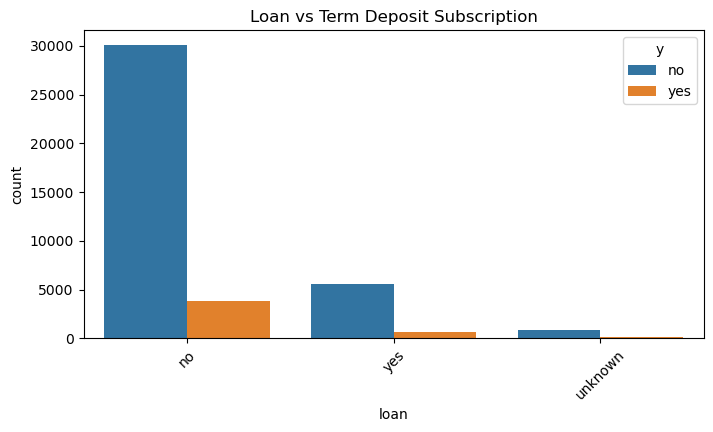

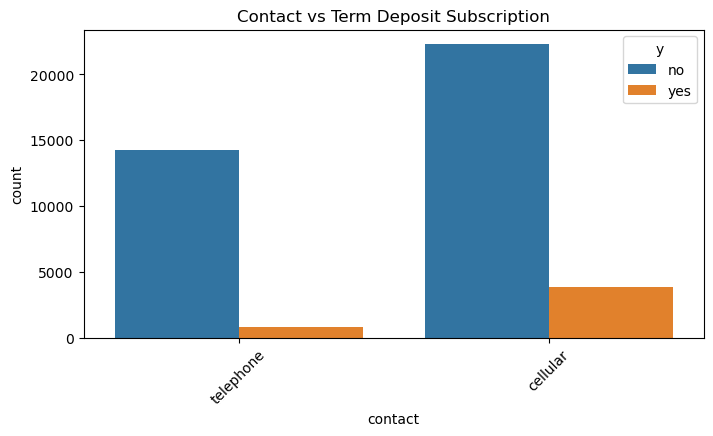

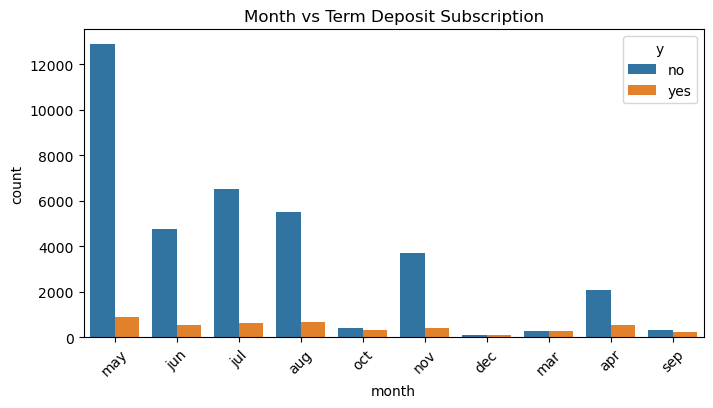

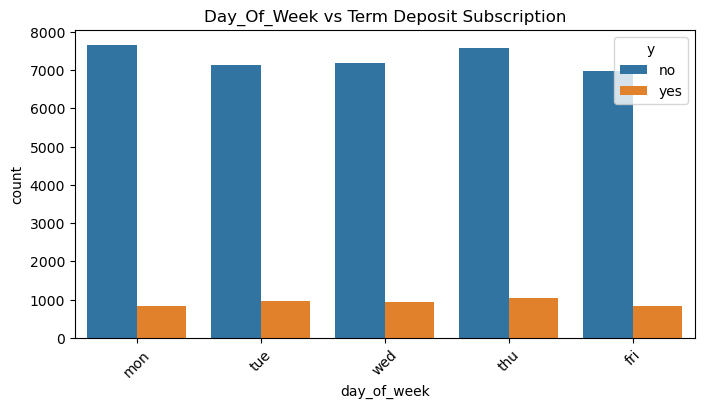

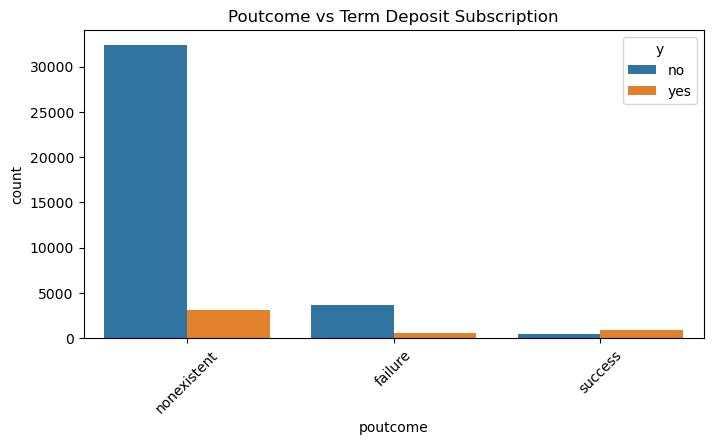

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('y') if 'y' in cat_cols else None  # Exclude target variable

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'{col.title()} vs Term Deposit Subscription')
    plt.xticks(rotation=45)
    plt.show()
    

In [13]:
# droping duraiton column as it is not a feature for prediction
df.drop(columns=['duration'], inplace=True)


In [14]:
# Binary Encoding for yes/no columns
yes_no_cols = ['default', 'housing', 'loan', 'y']
for col in yes_no_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()  # normalize strings
    df[col] = df[col].map({'yes': 1, 'no': 0, 'unknown': -1})  # apply binary map


In [15]:
# checking to see if binary encoding was successful
for col in yes_no_cols:
    print(f"{col}: {df[col].unique()}")

default: [ 0 -1  1]
housing: [ 0  1 -1]
loan: [ 0  1 -1]
y: [0 1]


In [16]:
# Treat 999 in pdays as separate category
df['pdays_was_999'] = (df['pdays'] == 999).astype(int)

In [17]:
# One hot Encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)
df = df.astype(int)

In [18]:
# defining features and target variable
X = df.drop(columns=['y'])
y = df['y']

In [19]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify =y, test_size=0.2, random_state=42)

In [20]:
# handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=42)
model = RandomForestClassifier(class_weight='balanced',random_state=42)

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('smote', smote),
    ('model', model)
])

In [21]:
X_train

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
25611,49,-1,0,0,4,999,0,0,93,-42,...,0,1,0,0,0,0,0,1,1,0
26010,37,0,0,0,2,999,1,0,93,-42,...,0,1,0,0,0,0,0,1,0,0
40194,78,0,0,0,1,999,0,-1,94,-40,...,0,0,0,0,1,0,0,0,1,0
297,36,0,1,0,2,999,0,1,93,-36,...,1,0,0,0,1,0,0,0,1,0
36344,59,0,0,0,2,999,0,-2,92,-40,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,28,0,1,0,1,999,0,-1,94,-40,...,0,0,0,0,0,0,1,0,1,0
27316,52,0,1,0,1,999,1,0,93,-42,...,0,1,0,0,0,0,0,0,0,0
14392,54,0,0,1,4,999,0,1,93,-42,...,0,0,0,0,1,0,0,0,1,0
7494,29,0,0,0,1,999,0,1,93,-36,...,1,0,0,0,0,0,0,0,1,0


**Model Training**

In [28]:
print(df['y'].isna().sum())

0


In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [23]:
# Predicting and evaluting 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      7310
           1       0.50      0.37      0.42       928

    accuracy                           0.89      8238
   macro avg       0.71      0.66      0.68      8238
weighted avg       0.87      0.89      0.88      8238

Confusion Matrix:
 [[6970  340]
 [ 588  340]]
ROC AUC Score: 0.7730697792348696


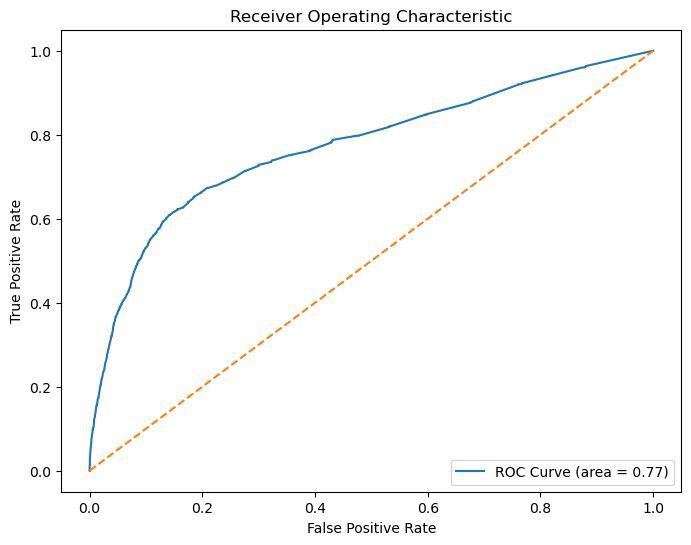

In [24]:
#plot ROC curve

fpr, tpr,_ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Feature Importance Analysis
feature_importances = pipeline.named_steps['model'].feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

C:\Users\kanim\AppData\Local\Temp\ipykernel_24960\3431791767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= features_df.head(20), x = 'Importance', y='Feature', palette='viridis')


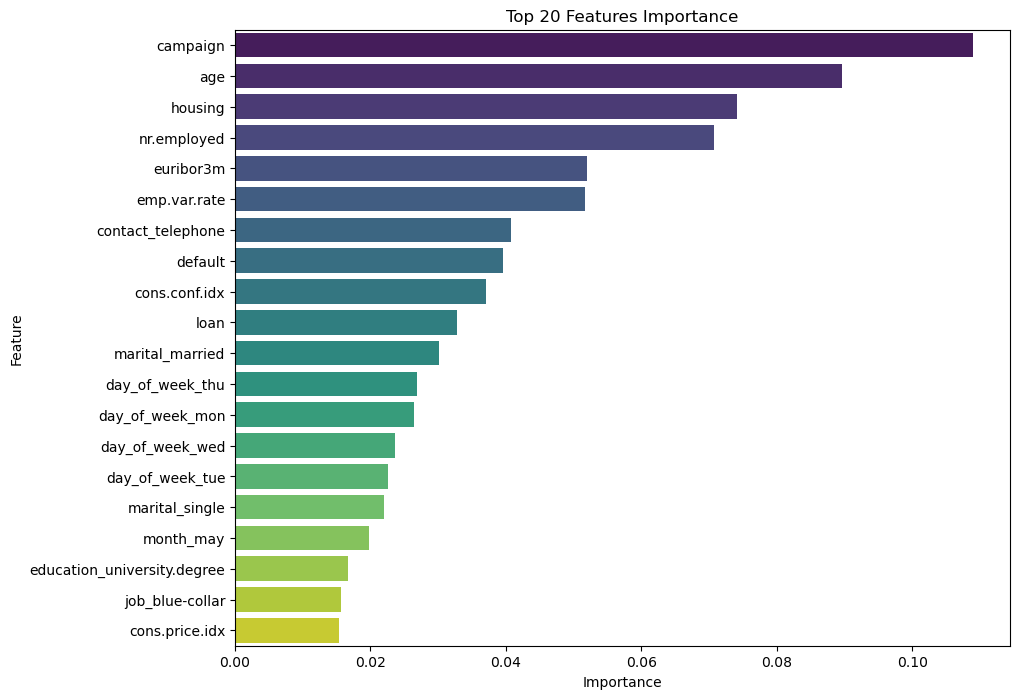

In [26]:
# plotting top features
plt.figure(figsize=(10, 8))
sns.barplot(data= features_df.head(20), x = 'Importance', y='Feature', palette='viridis')
plt.title('Top 20 Features Importance')
plt.show()

In [27]:
# --- Drop Low-Importance Features and Retrain Model ---
low_importance_features = features_df[features_df['Importance'] < 0.005]['Feature'].tolist()
print(f"\nDropping {len(low_importance_features)} low-importance features...")

X_reduced = X.drop(columns=low_importance_features)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, stratify=y, test_size=0.2, random_state=42)

pipeline_reduced = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(class_weight='balanced',random_state=42))
])

pipeline_reduced.fit(X_train_red, y_train_red)



Dropping 17 low-importance features...


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [28]:
# Evaluate reduced model
y_pred_red = pipeline_reduced.predict(X_test_red)
y_prob_red = pipeline_reduced.predict_proba(X_test_red)[:, 1]

print("\n--- Reduced Model Evaluation ---")
print("Classification Report:\n", classification_report(y_test_red, y_pred_red))
print("Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_red))
print("ROC AUC Score:", roc_auc_score(y_test_red, y_prob_red))


--- Reduced Model Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      7310
           1       0.48      0.37      0.42       928

    accuracy                           0.88      8238
   macro avg       0.70      0.66      0.68      8238
weighted avg       0.87      0.88      0.88      8238

Confusion Matrix:
 [[6942  368]
 [ 582  346]]
ROC AUC Score: 0.7709745300485871
